## Have fun with linear model

Author: hdup  
My contact info:  
hdup [huangdan@youhujia.com](mailto:huangdan@youhujia.com)  
evitself [evitself@gmail.com](mailto:evitself@gmail.com)

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils
import models as ml

%matplotlib inline

### Let's play with linear regression

#### Prepare sample data

In [2]:
sample_cnt = 100

train_X = np.linspace(-3.0, 3.0, num=sample_cnt, dtype=np.float32).reshape((sample_cnt, 1))
train_y = train_X * 0.375 + 1.1

print(train_X.shape)

(100, 1)


### Implement with numpy

#### 1), define model, cost, and derivative

- Please see models.py

#### 2), training

epoch: 100, cost:49.46481661505311, W:[[ 0.30853031]], b:[[ 0.1225002]]
epoch: 200, cost:6.532318912146525, W:[[ 0.3720307]], b:[[ 0.74220347]]
epoch: 300, cost:0.8750084653530338, W:[[ 0.37486736]], b:[[ 0.96903492]]
epoch: 400, cost:0.11723297153441278, W:[[ 0.37499408]], b:[[ 1.05206256]]
epoch: 500, cost:0.015706834654256884, W:[[ 0.37499974]], b:[[ 1.08245336]]
epoch: 600, cost:0.002104396598579044, W:[[ 0.37499999]], b:[[ 1.09357738]]
epoch: 700, cost:0.00028194637210656815, W:[[ 0.375]], b:[[ 1.09764913]]
epoch: 800, cost:3.7775083321809945e-05, W:[[ 0.375]], b:[[ 1.09913952]]
epoch: 900, cost:5.061093440793499e-06, W:[[ 0.375]], b:[[ 1.09968505]]
epoch: 1000, cost:6.780837132375798e-07, W:[[ 0.375]], b:[[ 1.09988473]]
training finished!
final cost: 6.64589848715221e-07, W: [[ 0.375]], b: [[ 1.09988473]]


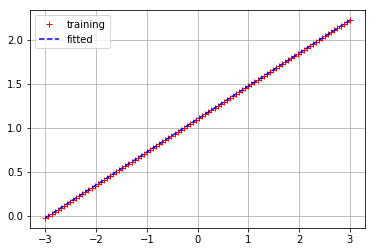

In [3]:
W, b = ml.create_parameters(1, 1)

# batch learning
for epoch in range(0, 1000):
    h = ml.linear_model(train_X, W, b)
    dW, db = ml.mse_cost_dev(train_X, train_y, h)
    W, b = ml.gd_update(W, b, dW, db, lr=0.01)
    if (epoch + 1) % 100 == 0:
        cur_cost = ml.mse_cost(h, train_y)
        print('epoch: {0}, cost:{1}, W:{2}, b:{3}'.format(epoch + 1, cur_cost, W, b))

# finish
h = ml.linear_model(train_X, W, b)
cost = ml.mse_cost(h, train_y)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}'.format(cost, W, b))

# then plot some curves
plt.plot(train_X, train_y, 'r+', label='training')
plt.plot(train_X, h, 'b--', label='fitted')
plt.grid(True)
plt.legend()
plt.show()

### Logistic regression (generalized linear model) with numpy

#### 1), define model, cost, and derivative

- Please see models.py

#### 2), prepare label data

In [4]:
train_y_binary = np.array([1.0 if i > 0.5 else 0 for i in train_y]).reshape(sample_cnt, 1)

#### 3), training

epoch: 1000, cost: 0.09965448380629369, W: [[ 2.7524309]], b: [[ 4.08371273]], acc: 0.98
epoch: 2000, cost: 0.07796054815454098, W: [[ 3.51350961]], b: [[ 5.3283974]], acc: 0.99
epoch: 3000, cost: 0.06756762081643367, W: [[ 4.04669172]], b: [[ 6.19324976]], acc: 0.99
epoch: 4000, cost: 0.061076598427761086, W: [[ 4.47022231]], b: [[ 6.8769489]], acc: 0.99
epoch: 5000, cost: 0.05649351277097907, W: [[ 4.82718551]], b: [[ 7.45131256]], acc: 0.99
epoch: 6000, cost: 0.05301716190331021, W: [[ 5.1387173]], b: [[ 7.9513819]], acc: 1.0
epoch: 7000, cost: 0.05025296138539325, W: [[ 5.41693466]], b: [[ 8.39715911]], acc: 1.0
epoch: 8000, cost: 0.047980305884745535, W: [[ 5.66950052]], b: [[ 8.80124872]], acc: 1.0
epoch: 9000, cost: 0.04606460679409032, W: [[ 5.90160242]], b: [[ 9.17215793]], acc: 1.0
epoch: 10000, cost: 0.04441828168114121, W: [[ 6.11693291]], b: [[ 9.51592671]], acc: 1.0
training finished!
final cost: 0.04441674890448162, W: [[ 6.11693291]], b: [[ 9.51592671]], acc: 1.0


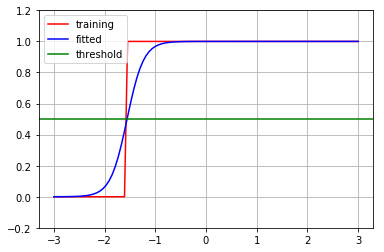

In [9]:
W, b = ml.create_parameters(1, 1)

threshold = 0.5

# batch learning
for epoch in range(0, 10000):
    h = ml.logistic_model(train_X, W, b)
    dW, db = ml.log_cost_dev(train_X, train_y_binary, h)
    W, b = ml.gd_update(W, b, dW, db, lr=0.1)
    if (epoch + 1) % 1000 == 0:
        cur_cost = ml.log_cost(h, train_y_binary)
        acc = ml.binary_accuracy(h, train_y_binary, threshold=threshold)
        print('epoch: {0}, cost: {1}, W: {2}, b: {3}, acc: {4}'.format(epoch + 1, cur_cost, W, b, acc))

# finish
h = ml.logistic_model(train_X, W, b)
final_cost = ml.log_cost(h, train_y_binary)
final_acc = ml.binary_accuracy(h, train_y_binary, threshold=threshold)
print('training finished!')
print('final cost: {0}, W: {1}, b: {2}, acc: {3}'.format(final_cost, W, b, final_acc))

# then plot some curves
plt.plot(train_X, train_y_binary, 'r-', label='training')
plt.plot(train_X, h, 'b-', label='fitted')
plt.axhline(y=threshold, color='g', linestyle='-', label='threshold')
plt.grid(True)
plt.ylim([-0.2, 1.2])
plt.legend()
plt.show()

### Time to have fun with cracking captcha with LR model

#### 1), load and prepare data

In [10]:
from helpers import corpus, corpus_len, show_img, prepare_data, one_hot_to_label, showcase

In [11]:
train_data = np.load('./data/data.npz')
train_X=train_data['X']
train_y=train_data['y']
print('train shape X {0}, y {1}'.format(train_X.shape, train_y.shape))

validate_data = np.load('./data/val.npz')
validate_X=validate_data['X']
validate_y=validate_data['y']
print('validation shape X {0}, y {1}'.format(validate_X.shape, validate_y.shape))

test_data = np.load('./data/test.npz')
test_X=test_data['X']
test_y=test_data['y']
print('test shape X {0}, y {1}'.format(test_X.shape, test_y.shape))

train_X, train_y = prepare_data(train_X, train_y)
validate_X, validate_y = prepare_data(validate_X, validate_y)
test_X, test_y = prepare_data(test_X, test_y)

train shape X (100000, 30, 30), y (100000, 26)
validation shape X (20000, 30, 30), y (20000, 26)
test shape X (10000, 30, 30), y (10000, 26)


#### 2), let's take character A as example

You should know one-vs-all

In [12]:
sample_cnt = train_X.shape[0]
feature_cnt = train_X.shape[1] * train_X.shape[2]

train_X_a = train_X.reshape((sample_cnt, feature_cnt))
validate_X_a = validate_X.reshape((validate_X.shape[0], feature_cnt))
test_X_a = test_X.reshape((test_X.shape[0], feature_cnt))

train_y_a = train_y[:,0:1]
validate_y_a = validate_y[:,0:1]
test_y_a = test_y[:,0:1]

print(train_X_a.shape)
print(train_y_a.shape)

(100000, 900)
(100000, 1)


#### 3), training

epoch: 20, cost: 0.04026350737880872, val_conf: (0.7696629213483146, 0.906084656084656, 0.8323207776427702)
epoch: 40, cost: 0.031619522232216625, val_conf: (0.8641160949868074, 0.8664021164021164, 0.8652575957727874)
epoch: 60, cost: 0.031276563933689695, val_conf: (0.8837209302325582, 0.8544973544973545, 0.8688634835238735)
epoch: 80, cost: 0.03149535225557427, val_conf: (0.8916323731138546, 0.8597883597883598, 0.8754208754208753)
epoch: 100, cost: 0.03180484057178183, val_conf: (0.8857142857142857, 0.8611111111111112, 0.8732394366197184)
training finished!
final cost: 0.02501726767614362, conf: (0.8948045267489712, 0.9031671858774662, 0.8989664082687338)
test cost: 0.029685234518564863, conf: (0.864321608040201, 0.9076517150395779, 0.8854568854568854)


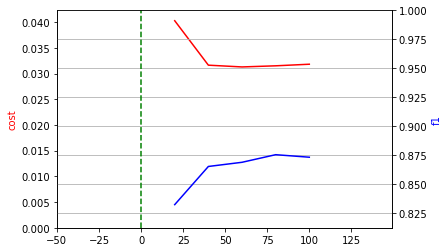

In [15]:
threshold = 0.5

W, b = ml.create_parameters(900, 1)

epoch_arr = []
cost_arr = []
metric_arr = []

step = 20
batch_size = 20

# mini-batch learning
batch_blocks = sample_cnt / batch_size
for epoch in range(0, 100):
    # launch mini-batch
    batch_start = 0    
    while(batch_start + batch_size < sample_cnt):
        batch_X = train_X_a[batch_start:batch_start+batch_size,:]
        batch_y = train_y_a[batch_start:batch_start+batch_size,:] 
        h = ml.logistic_model(batch_X, W, b)
        dW, db = ml.log_cost_dev(batch_X, batch_y, h)
        W, b = ml.gd_update(W, b, dW, db, lr=0.1)
        batch_start += batch_size
        
    # eval epoch
    if (epoch + 1) % step == 0:
        h = ml.logistic_model(validate_X_a, W, b)
        cur_cost = ml.log_cost(h, validate_y_a)
        cur_conf = ml.binary_confusion_matrix(h, validate_y_a, threshold=threshold)        
        print('epoch: {0}, cost: {1}, val_conf: {2}'.format(epoch + 1, cur_cost, cur_conf))
        epoch_arr.append(epoch + 1)
        cost_arr.append(cur_cost)
        metric_arr.append(cur_conf[2])

# finish
predictions = ml.logistic_model(train_X_a, W, b)
final_cost = ml.log_cost(predictions, train_y_a)
final_conf = ml.binary_confusion_matrix(predictions, train_y_a, threshold=threshold)
print('training finished!')
print('final cost: {0}, conf: {1}'.format(final_cost, final_conf))

# calculate test conf
test_h = ml.logistic_model(test_X_a, W, b)
test_cost = ml.log_cost(test_h, test_y_a)
test_conf = ml.binary_confusion_matrix(test_h, test_y_a, threshold=threshold)
print('test cost: {0}, conf: {1}'.format(test_cost, test_conf))

# plot learning curve
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(epoch_arr, cost_arr, 'r-', label='cost')
ymax = np.max(cost_arr)
plt.ylim([0.0, ymax * 1.05])
ax1.set_ylabel('cost', color='r')

ax2 = ax1.twinx()
ax2.plot(epoch_arr, metric_arr, 'b-', label='f1')
ymin = np.min(metric_arr)
plt.ylim([ymin-0.02 if ymin-0.02 > 0.0 else 0.0, 1.0])
ax2.set_ylabel('f1', color='b')

plt.axvline(x=0, color='g', linestyle='--')
plt.grid(True)
plt.xlim([-50, epoch + 50])
plt.show()

### Let's play it with softmax model

In [16]:
sample_count = train_X.shape[0]
feature_count = train_X.shape[1] * train_X.shape[2]
class_count = train_y.shape[1]

train_X = train_X.reshape((sample_count, feature_count))
test_X = test_X.reshape((test_X.shape[0], feature_count))
validate_X = validate_X.reshape((validate_X.shape[0], feature_count))

In [17]:
W, b = ml.create_parameters(feature_count, class_count)

In [20]:
epoch_arr = []
cost_arr = []
metric_arr = []

step = 20
batch_size = 20

# mini-batch learning
batch_blocks = sample_cnt / batch_size
for epoch in range(0, 100):
    # launch mini-batch
    batch_start = 0    
    while(batch_start + batch_size < sample_count):
        batch_X = train_X[batch_start:batch_start+batch_size,:]
        batch_y = train_y[batch_start:batch_start+batch_size,:] 
        h = ml.softmax_regression_model(batch_X, W, b)
        dW, db = ml.crossentropy_cost_dev(batch_X, batch_y, h)
        W, b = ml.gd_update(W, b, dW, db, lr=0.01)
        batch_start += batch_size
        
    # eval epoch
    if (epoch + 1) % step == 0:
        h = ml.softmax_regression_model(validate_X, W, b)
        cur_cost = ml.crossentropy_cost(h, validate_y)  
        cur_acc = ml.categorical_accuracy(h, validate_y)
        print('epoch: {0}, cost: {1}, val_acc: {2}'.format(epoch + 1, cur_cost, cur_acc))
        epoch_arr.append(epoch + 1)
        cost_arr.append(cur_cost)

# finish
h = ml.softmax_regression_model(train_X, W, b)
final_cost = ml.crossentropy_cost(h, train_y)
final_acc = ml.categorical_accuracy(h, train_y)
print('training finished!')
print('final cost: {0}, acc: {1}'.format(final_cost, final_acc))

epoch: 20, cost: 0.043639285788023216, val_acc: 0.70435
epoch: 40, cost: 0.038175617602424224, val_acc: 0.7367
epoch: 60, cost: 0.03518309384820249, val_acc: 0.75305
epoch: 80, cost: 0.033300410974298575, val_acc: 0.76485
epoch: 100, cost: 0.03201217992696259, val_acc: 0.77185
training finished!
final cost: 0.027995139835594516, acc: 0.79487
